In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011', index_col=0)

In [3]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Invoice,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#To copy dataFrame.
dfCopy = df.copy()

In [5]:
dfCopy = dfCopy.reset_index()
dfCopy

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
print(dfCopy.isnull().sum())

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64


In [7]:
dfCopy.dropna(thresh=None, subset=None, inplace=True)

In [8]:
print(dfCopy.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [9]:
dfCopy = dfCopy[~dfCopy["Invoice"].str.contains("C", na=False)]

In [10]:
dfCopy.shape

(397925, 8)

In [11]:
dfCopy['TotalPrice'] = dfCopy['Price'] * dfCopy['Quantity']
dfCopy

<ipython-input-11-744afebc7b98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy['TotalPrice'] = dfCopy['Price'] * dfCopy['Quantity']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [12]:
dfCopy = dfCopy[dfCopy['Quantity'] > 0]
dfCopy = dfCopy[dfCopy['TotalPrice'] > 0]

In [13]:
dfCopy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0,12.988208,179.331551,1.000,2.00,6.00,12.00,80995.00
Price,397885.0,3.116525,22.097861,0.001,1.25,1.95,3.75,8142.75
Customer ID,397885.0,15294.416882,1713.144421,12346.000,13969.00,15159.00,16795.00,18287.00
TotalPrice,397885.0,22.396989,309.070653,0.001,4.68,11.80,19.80,168469.60


In [14]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397885 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397885 non-null  object        
 1   StockCode    397885 non-null  object        
 2   Description  397885 non-null  object        
 3   Quantity     397885 non-null  int64         
 4   InvoiceDate  397885 non-null  datetime64[ns]
 5   Price        397885 non-null  float64       
 6   Customer ID  397885 non-null  float64       
 7   Country      397885 non-null  object        
 8   TotalPrice   397885 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [15]:
#Recency: musterinin son satin alma isleminden bugune kadar gecen sure
#Frequency: musterinin toplam satin alma sayisi
#Monetary: toplam ciro

In [16]:
dfCopy["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [17]:
today_date = pd.datetime(2011, 12, 11)

<ipython-input-17-1317e1b676c6>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today_date = pd.datetime(2011, 12, 11)


In [18]:
#Calculate recency metric.
dfCopy.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days})

,InvoiceDate
Customer ID,
12346.0,326
12347.0,3
12348.0,76
12349.0,19
12350.0,311
...,...
18280.0,278
18281.0,181
18282.0,8


In [19]:
#Calculate frequency metric.
dfCopy.groupby('Customer ID').agg({'Invoice': lambda num: num.nunique()})

,Invoice
Customer ID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,2


In [20]:
#Calculate monetary metric.
dfCopy.groupby('Customer ID').agg({"TotalPrice": lambda price: price.sum()})

,TotalPrice
Customer ID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [21]:
#Assign your calculated metrics to a variable named rfm.
rfm = dfCopy.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                                'Invoice': lambda num: num.nunique(),
                                                'TotalPrice': lambda price: price.sum()})

In [22]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [23]:
#Change the names of the metrics we created as recency, frequency and monetary.
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [24]:
#Filter dataset to "monetary>0".
rfm[~((rfm["monetary"]) > 0)]

,recency,frequency,monetary
Customer ID,,,


In [25]:
rfm = rfm[(rfm['monetary'] > 0)]
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [26]:
#K-Means Segmentation.

In [27]:
rfm.recency.describe()

count    4338.000000
mean       93.059474
std       100.012264
min         1.000000
25%        18.000000
50%        51.000000
75%       142.750000
max       374.000000
Name: recency, dtype: float64

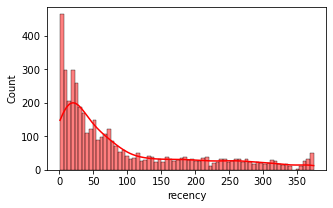

In [28]:
plt.figure(figsize=(5,3))
x = rfm['recency']
ax1 = sns.histplot(x, kde=True, color='red', bins=70)

In [29]:
rfm.frequency.describe()

count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: frequency, dtype: float64

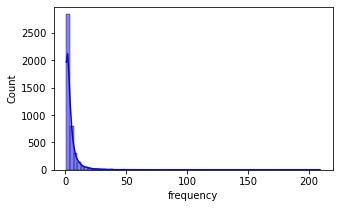

In [30]:
plt.figure(figsize=(5,3))
x = rfm.query('frequency < 1000')['frequency']
ax2 = sns.histplot(x, kde=True, color='blue', bins=70)

In [31]:
rfm.monetary.describe()

count      4338.000000
mean       2054.270609
std        8989.229895
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: monetary, dtype: float64

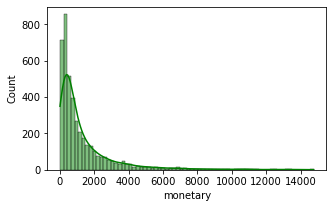

In [32]:
plt.figure(figsize=(5,3))
x = rfm.query('monetary < 15000')['monetary']
ax3 = sns.histplot(x, kde=True, color='green', bins=70)

In [33]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [34]:
quantiles

{'recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.75},
 'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [51]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler((0,1))
x_scaled = min_max_scaler.fit_transform(rfm)
data_scaled = pd.DataFrame(x_scaled)

In [50]:
dfCopy[0:10]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.50


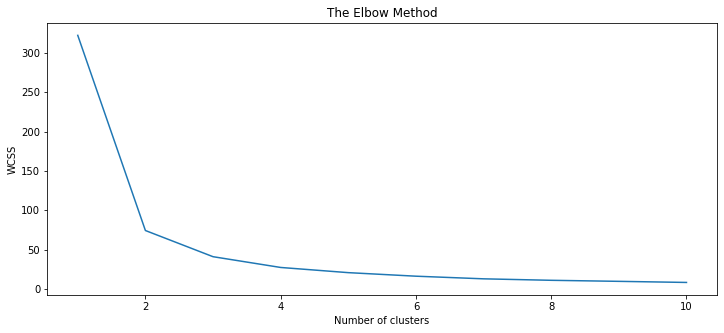

In [37]:
plt.figure(figsize=(12,5))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=10, max_iter = 300)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
#Create the clusters.

In [54]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init =10,max_iter = 300)
kmeans.fit(data_scaled)
cluster = kmeans.predict(data_scaled)

In [56]:
d_frame = pd.DataFrame(rfm)
d_frame['cluster_no'] = cluster
d_frame['cluster_no'].value_counts()

0    2207
2    1036
1     598
3     497
Name: cluster_no, dtype: int64

In [57]:
kmeans = KMeans(n_clusters=4)

In [58]:
kmeans.fit(rfm)

KMeans(n_clusters=4)

In [59]:
kmeans.cluster_centers_

array([[9.36465116e+01, 3.89488372e+00, 1.43819457e+03, 9.66511628e-01],
       [9.40000000e+00, 6.50000000e+01, 1.49828502e+05, 0.00000000e+00],
       [3.10322581e+01, 4.27741935e+01, 4.63930139e+04, 1.61290323e-01],
       [1.50000000e+00, 6.65000000e+01, 2.69931660e+05, 0.00000000e+00]])

In [61]:
kmeans.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [62]:
rfm.head()

,recency,frequency,monetary,cluster_no
Customer ID,,,,
12346.0,326,1,77183.60,3
12347.0,3,7,4310.00,0
12348.0,76,4,1797.24,2
12349.0,19,1,1757.55,0
12350.0,311,1,334.40,3


In [63]:
d_frame.groupby('cluster_no').mean()

,recency,frequency,monetary
cluster_no,,,
0,20.817852,6.357046,3239.318800
1,194.018395,1.864548,721.201958
2,84.854247,2.621622,1012.852811
3,309.486922,1.350101,566.710322


In [64]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(d_frame['cluster_no'],kmeans.labels_))
print(classification_report(d_frame['cluster_no'],kmeans.labels_))

[[2172    5   28    2]
 [ 596    0    2    0]
 [1036    0    0    0]
 [ 496    0    1    0]]
              precision    recall  f1-score   support

           0       0.51      0.98      0.67      2207
           1       0.00      0.00      0.00       598
           2       0.00      0.00      0.00      1036
           3       0.00      0.00      0.00       497

    accuracy                           0.50      4338
   macro avg       0.13      0.25      0.17      4338
weighted avg       0.26      0.50      0.34      4338

